<a href="https://colab.research.google.com/github/Prathamesh282001/Phishing_Website_Detection_ML_Project/blob/main/Phishing_website_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("urldata.csv")

In [18]:
df.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [19]:
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


<Axes: >

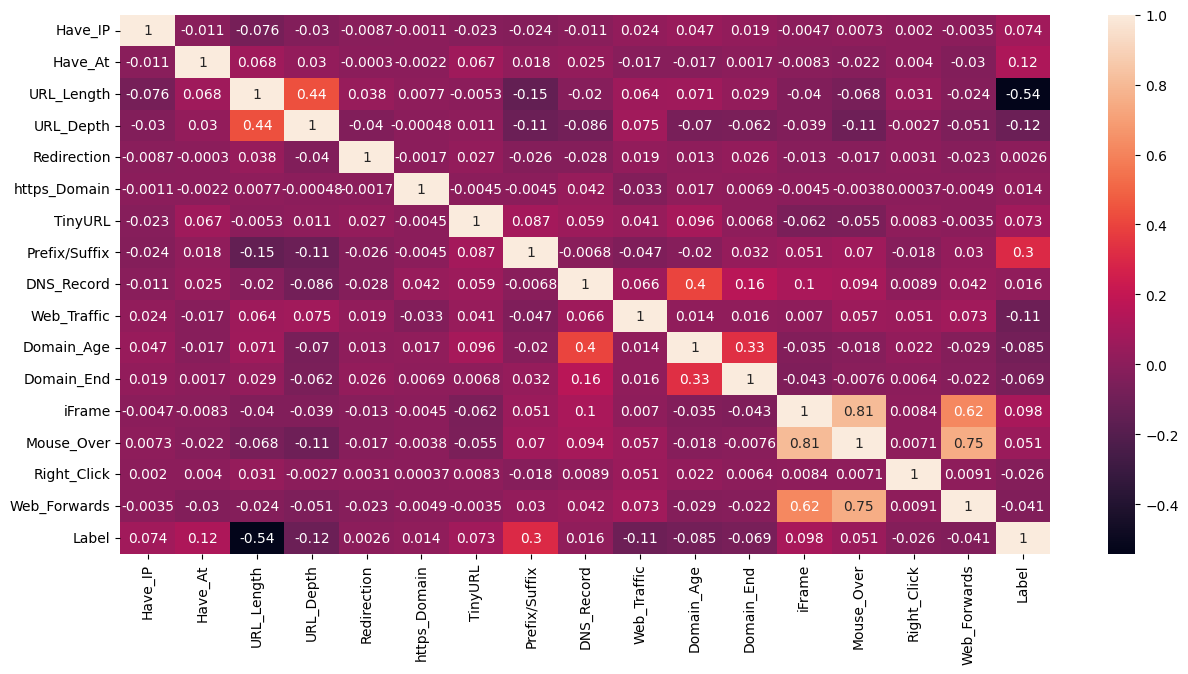

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [21]:
df = df.drop(["Domain","Mouse_Over"],axis=1)

In [22]:
df = df.sample(frac=1).reset_index(drop=True)

In [23]:
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,0,1,1,0,1,0,0
1,0,0,1,3,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,2,0,0,0,0,0,0,1,1,0,1,0,0
3,0,0,1,4,0,0,0,0,0,0,1,1,0,1,0,0
4,0,0,1,4,0,0,0,0,0,1,1,1,0,1,0,0


In [24]:
df["Label"].value_counts()

0    5000
1    5000
Name: Label, dtype: int64

In [25]:
x = df.drop("Label",axis=1)
y = df["Label"]

In [38]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
LR = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

print("Logistic Regression with l1")
print("------------------------------------")

print(classification_report(y_test, y_pred))

Logistic Regression with l1
------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       972
           1       0.92      0.64      0.75      1028

    accuracy                           0.79      2000
   macro avg       0.82      0.79      0.78      2000
weighted avg       0.82      0.79      0.78      2000



In [57]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print("XGBOOST")
print("------------------------------------")

print(classification_report(y_test, y_pred))

XGBOOST
------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.94      0.86       972
           1       0.93      0.76      0.84      1028

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("Random Forest")
print("------------------------------------")

print(classification_report(y_test, y_pred))

Random Forest
------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       972
           1       0.94      0.76      0.84      1028

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
nn = Sequential()
nn.add(Dense(64,activation='relu',input_shape=(15,)))
nn.add(Dense(32,activation='relu'))
nn.add(Dense(1,activation='sigmoid'))

In [34]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
nn.fit(x_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
250/250 [==============================] - 1s 5ms/step - loss: 0.3121 - accuracy: 0.8594
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8636
Epoch 3/15
250/250 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 0.8620
Epoch 4/15
250/250 [==============================] - 1s 4ms/step - loss: 0.3124 - accuracy: 0.8609
Epoch 5/15
250/250 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8612
Epoch 6/15
250/250 [==============================] - 1s 4ms/step - loss: 0.3122 - accuracy: 0.8625
Epoch 7/15
250/250 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.8631
Epoch 8/15
250/250 [==============================] - 1s 2ms/step - loss: 0.3108 - accuracy: 0.8646
Epoch 9/15
250/250 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8625
Epoch 10/15
250/250 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8636

In [53]:
nn.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.8465


[0.35460150241851807, 0.8464999794960022]

<h1><font color=white>END!